# Tarea 1 -  COM4001 Minería de Datos
## Profesor: Luis Cossio.
## Ayudante: Luis Miranda.
---

- Nombre: Fabián Ayala
- Fecha de Entrega: 17/04/2024

## Objetivos
- Repaso Programación funcional en Python.
- Uso de colaboratory y entrega de informes basados en esta herramienta.
- Introducción a las librerías Numpy, Pandas y Matplotlib.
- Introducción al manejo de datos, visualización y cálculo de estadisticas básicas.
- Análisis de métricas de distancia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Instrucciones
- La tarea a realizar se debe presentar de forma individual, cualquier copia o plagio será sancionada con nota 1.0 a todos los involucrados y con posible sumario.
- La tarea consiste en resolver las preguntas relacionadas a la base de datos a estudiar,
aplicando los conceptos de programación aprendidos en Catedras y Ayudantías. Las
soluciones en código y las interpretaciones de resultados deben ir en el mismo notebook
donde se va creando el informe y serán evaluadas.
- La tarea debe contener una sección de discusión y conclusiones de los resultados obtenidos, sientase libre de explayarse profundamente en este punto.
- Se debe agregar una sección de referencias al final de la tarea, agregando la documentación con la que se trabajó.
- IMPORTANTE: Para la presentación final de la tarea se deben subir 2 archivos:
  1. El notebook Colab en formato Pred_wine.
  2. El notebook Colab en formato .ipynb

## Introducción

La base de datos a utilizar ha sido extraída de: http://archive.ics.uci.edu/ml/index.php

El dataset esta compuesto por dos archivos llamados winequality-red.csv y winequality-white.csv. Puede acceder y descargar los archivos desde ucampus.

Las variables del dataset representan:

-  fija
- acidez volátil
- ácido cítrico
- azúcar residual
- cloruros
- anhídrido sulfuroso libre
- anhídrido sulfuroso total
- densidad
- pH
- sulfatos
- alcohol
- calidad

## Parte 1: Cargar Datos y Análisis preliminar

Descarge los datos desde ucampus. Cargue los archivos en colab utilizando la librería pandas. Puede utilizar la función read_csv de la misma librería. Considere que los datos están separados por un punto y una coma (";") y no una coma como lo considera la función por defecto.

A continuación debe calcular estadísticas básicas de los datos. Para cada conjunto (vinos tintos y blancos), calcule y responda:

- Determine la cantidad de instancias (número de muestras) en cada dataset.
- Cuantos y cuáles son los atributos (columnas) de los set de datos, además muestre el tipo de dato asociado a cada variable.
- Implemente funciones propias para calcular el promedio, la mediana, el mínimo, el máximo y la desviación estandar de cada uno de los atributos, luego utilice las funciones por defecto de numpy o pandas y compare los resultados obtenidos, mencione cualquier observacion relevante.
- Investigue, explique y presente la matriz de correlación entre los atributos del dataset.

**Primero que nada cargamos todas las librerias necesarias para empezar a manejar los datasets.**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### 1.-

In [ ]:
red_wine_ruta = 'winequality-red.csv'
white_wine_ruta = 'winequality-white.csv'

# Datasets
red_wine = pd.read_csv(red_wine_ruta, sep=';')
white_wine = pd.read_csv(white_wine_ruta, sep=';')

# Cantidad de Muestras
n_red_wine = red_wine.shape[0]  # Número de muestras de vino tinto
n_white_wine = white_wine.shape[0]  # Número de muestras de vino blanco

print(f'Número de muestras de vino tinto: {n_red_wine}')
print(f'Número de muestras de vino blanco: {n_white_wine}')

Número de muestras de vino tinto: 1599
Número de muestras de vino blanco: 4898


In [ ]:
# VINO TINTO
print("Vino Tinto  - Atributos y Tipos de Datos:")
print(red_wine.dtypes)

# VINO BLANCO
print("\nVino blanco - Atributos y Tipos de Datos:")
print(white_wine.dtypes)

Vino Tinto  - Atributos y Tipos de Datos:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Vino blanco - Atributos y Tipos de Datos:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Formulas para calcular el promedio, la mediana, el mínimo, el máximo y la desviación estandar

In [ ]:
def promedio(datos):
    return sum(datos) / len(datos)

def mediana(datos):
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)
    mitad = n // 2
    if n % 2 == 0:
        return (datos_ordenados[mitad - 1] + datos_ordenados[mitad]) / 2
    else:
        return datos_ordenados[mitad]

def minimo(datos):
    min_val = datos[0]
    for val in datos[1:]:
        if val < min_val:
            min_val = val
    return min_val


def maximo(datos):
    max_val = datos[0]
    for val in datos[1:]:
        if val > max_val:
            max_val = val
    return max_val

def desviacion_estandar(datos):
    prom = promedio(datos)
    varianza = sum((x - prom) ** 2 for x in datos) / len(datos)
    return varianza ** 0.5

### ATRIBUTOS VINO TINTO EN ORDEN

---



In [ ]:
atributo = red_wine['fixed acidity']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 8.319637273295838
Mediana: 7.9
Mínimo: 4.6
Máximo: 15.9
Desviación Estándar: 1.7405518001102782


In [ ]:
atributo = red_wine['volatile acidity']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.5278205128205131
Mediana: 0.52
Mínimo: 0.12
Máximo: 1.58
Desviación Estándar: 0.17900370424468975


In [ ]:
atributo = red_wine['residual sugar']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 2.5388055034396517
Mediana: 2.2
Mínimo: 0.9
Máximo: 15.5
Desviación Estándar: 1.4094871124880504


In [ ]:
atributo = red_wine['chlorides']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.08746654158849257
Mediana: 0.079
Mínimo: 0.012
Máximo: 0.611
Desviación Estándar: 0.04705058260331576


In [ ]:
atributo = red_wine['free sulfur dioxide']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 15.874921826141339
Mediana: 14.0
Mínimo: 1.0
Máximo: 72.0
Desviación Estándar: 10.456885614930723


In [ ]:
atributo = red_wine['total sulfur dioxide']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 46.46779237023139
Mediana: 38.0
Mínimo: 6.0
Máximo: 289.0
Desviación Estándar: 32.88503665178367


In [ ]:
atributo = red_wine['density']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.9967466791744831
Mediana: 0.99675
Mínimo: 0.99007
Máximo: 1.00369
Desviación Estándar: 0.001886743700832392


In [ ]:
atributo = red_wine['pH']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 3.311113195747343
Mediana: 3.31
Mínimo: 2.74
Máximo: 4.01
Desviación Estándar: 0.15433818141060152


In [ ]:
atributo = red_wine['sulphates']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.6581488430268921
Mediana: 0.62
Mínimo: 0.33
Máximo: 2.0
Desviación Estándar: 0.16945396724179526


In [ ]:
atributo = red_wine['alcohol']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 10.422983114446502
Mediana: 10.2
Mínimo: 8.4
Máximo: 14.9
Desviación Estándar: 1.0653343003437463


In [ ]:
atributo = red_wine['quality']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 5.6360225140712945
Mediana: 6
Mínimo: 3
Máximo: 8
Desviación Estándar: 0.8073168769639486


### ATRIBUTOS VINO BLANCO

---



In [ ]:
atributo = white_wine['fixed acidity']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 6.854787668436075
Mediana: 6.8
Mínimo: 3.8
Máximo: 14.2
Desviación Estándar: 0.8437820791264564


In [ ]:
atributo = white_wine['volatile acidity']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.27824111882401087
Mediana: 0.26
Mínimo: 0.08
Máximo: 1.1
Desviación Estándar: 0.10078425854188867


In [ ]:
atributo = white_wine['citric acid']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.33419150673743736
Mediana: 0.32
Mínimo: 0.0
Máximo: 1.66
Desviación Estándar: 0.12100744957029266


In [ ]:
atributo = white_wine['residual sugar']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 6.391414863209486
Mediana: 5.2
Mínimo: 0.6
Máximo: 65.8
Desviación Estándar: 5.071539989333915


In [ ]:
atributo = white_wine['chlorides']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.0457723560636995
Mediana: 0.043
Mínimo: 0.009
Máximo: 0.346
Desviación Estándar: 0.0218457376850564


In [ ]:
atributo = white_wine['free sulfur dioxide']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 35.30808493262556
Mediana: 34.0
Mínimo: 2.0
Máximo: 289.0
Desviación Estándar: 17.00540110580839


In [ ]:
atributo = white_wine['total sulfur dioxide']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 138.36065741118824
Mediana: 134.0
Mínimo: 9.0
Máximo: 440.0
Desviación Estándar: 42.49372602475038


In [ ]:
atributo = white_wine['density']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.9940273764801896
Mediana: 0.99374
Mínimo: 0.98711
Máximo: 1.03898
Desviación Estándar: 0.0029906015821480293


In [ ]:
atributo = white_wine['pH']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 3.1882666394446693
Mediana: 3.18
Mínimo: 2.72
Máximo: 3.82
Desviación Estándar: 0.1509851843121206


In [ ]:
atributo = white_wine['sulphates']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 0.4898468762760325
Mediana: 0.47
Mínimo: 0.22
Máximo: 1.08
Desviación Estándar: 0.11411418310566399


In [ ]:
atributo = white_wine['alcohol']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 10.514267047774638
Mediana: 10.4
Mínimo: 8.0
Máximo: 14.2
Desviación Estándar: 1.2304949365418658


In [ ]:
atributo = white_wine['quality']
print("Promedio:", promedio(atributo))
print("Mediana:", mediana(atributo))
print("Mínimo:", minimo(atributo))
print("Máximo:", maximo(atributo))
print("Desviación Estándar:", desviacion_estandar(atributo))

Promedio: 5.87790935075541
Mediana: 6.0
Mínimo: 3
Máximo: 9
Desviación Estándar: 0.8855481621683685


### ATRIBUTOS VINO TINTO (NUMPY)

---



In [ ]:
for columna in red_wine.columns:
    print(f"-- {columna} --")
    promedio = red_wine[columna].mean()
    mediana = red_wine[columna].median()
    minimo = red_wine[columna].min()
    maximo = red_wine[columna].max()
    desviacion = red_wine[columna].std()


    print(f"Promedio: {promedio}")
    print(f"Mediana: {mediana}")
    print(f"Mínimo: {minimo}")
    print(f"Máximo: {maximo}")
    print(f"Desviación Estándar: {desviacion}\n")

-- fixed acidity --
Promedio: 8.31963727329581
Mediana: 7.9
Mínimo: 4.6
Máximo: 15.9
Desviación Estándar: 1.7410963181276953

-- volatile acidity --
Promedio: 0.5278205128205128
Mediana: 0.52
Mínimo: 0.12
Máximo: 1.58
Desviación Estándar: 0.17905970415353537

-- citric acid --
Promedio: 0.2709756097560976
Mediana: 0.26
Mínimo: 0.0
Máximo: 1.0
Desviación Estándar: 0.19480113740531857

-- residual sugar --
Promedio: 2.53880550343965
Mediana: 2.2
Mínimo: 0.9
Máximo: 15.5
Desviación Estándar: 1.4099280595072798

-- chlorides --
Promedio: 0.08746654158849279
Mediana: 0.079
Mínimo: 0.012
Máximo: 0.611
Desviación Estándar: 0.0470653020100901

-- free sulfur dioxide --
Promedio: 15.874921826141339
Mediana: 14.0
Mínimo: 1.0
Máximo: 72.0
Desviación Estándar: 10.460156969809725

-- total sulfur dioxide --
Promedio: 46.46779237023139
Mediana: 38.0
Mínimo: 6.0
Máximo: 289.0
Desviación Estándar: 32.895324478299074

-- density --
Promedio: 0.9967466791744841
Mediana: 0.99675
Mínimo: 0.99007
Máximo: 1

### ATRIBUTOS VINO BLANCO (NUMPY)


---



In [ ]:
for columna in white_wine.columns:
    print(f"-- {columna} --")
    promedio = white_wine[columna].mean()
    mediana = white_wine[columna].median()
    minimo = white_wine[columna].min()
    maximo = white_wine[columna].max()
    desviacion = white_wine[columna].std()


    print(f"Promedio: {promedio}")
    print(f"Mediana: {mediana}")
    print(f"Mínimo: {minimo}")
    print(f"Máximo: {maximo}")
    print(f"Desviación Estándar: {desviacion}\n")

-- fixed acidity --
Promedio: 6.854787668436097
Mediana: 6.8
Mínimo: 3.8
Máximo: 14.2
Desviación Estándar: 0.843868227687513

-- volatile acidity --
Promedio: 0.27824111882400976
Mediana: 0.26
Mínimo: 0.08
Máximo: 1.1
Desviación Estándar: 0.10079454842486534

-- citric acid --
Promedio: 0.33419150673744386
Mediana: 0.32
Mínimo: 0.0
Máximo: 1.66
Desviación Estándar: 0.12101980420298249

-- residual sugar --
Promedio: 6.391414863209474
Mediana: 5.2
Mínimo: 0.6
Máximo: 65.8
Desviación Estándar: 5.072057784014881

-- chlorides --
Promedio: 0.04577235606369946
Mediana: 0.043
Mínimo: 0.009
Máximo: 0.346
Desviación Estándar: 0.021847968093728798

-- free sulfur dioxide --
Promedio: 35.30808493262556
Mediana: 34.0
Mínimo: 2.0
Máximo: 289.0
Desviación Estándar: 17.00713732523259

-- total sulfur dioxide --
Promedio: 138.36065741118824
Mediana: 134.0
Mínimo: 9.0
Máximo: 440.0
Desviación Estándar: 42.49806455414291

-- density --
Promedio: 0.9940273764801959
Mediana: 0.99374
Mínimo: 0.98711
Máxim

Al comparar las estadísticas calculadas, por un lado las propias y por el otro las de Numpy. Podemos notar que existe un cambio muy mínimo en los decimales de las estadisticas del promedio y de la desviación estándar, pero estos cambios son tan leves que  no afecta en ningun momento el cálculo de la mediana, mínimo y máximo.

Pude observar que el único dato que presenta decimales que sí es identifico en ambos casos es en el atributo de Quality en la estadística del promedio, esto es debido a que el atributo en cuestión solo presenta números enteros y no decimales.

### MATRIZ DE CORRELACIÓN

---



**Vino Tinto**

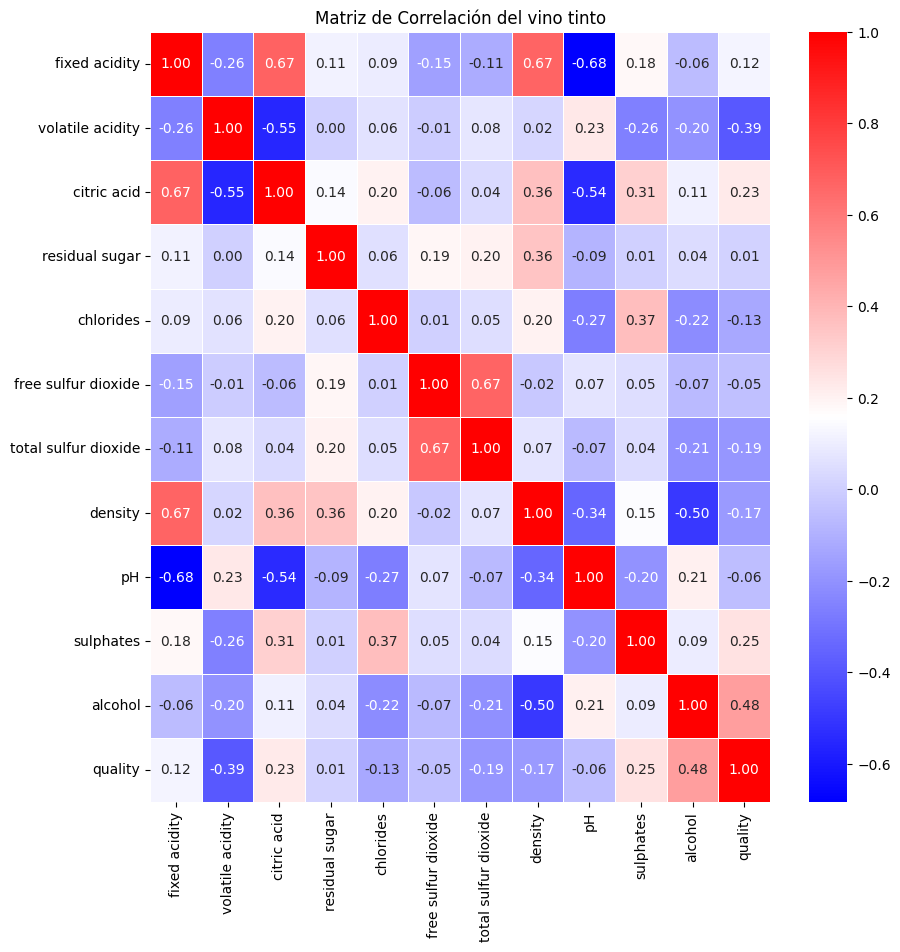

In [ ]:
cov_matrix = red_wine.corr()

# Mostraremos la matriz de correlación en una gráfica para analizarla de manera más sencilla
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='bwr', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación del vino tinto')
plt.show()

**Vino Blanco:**




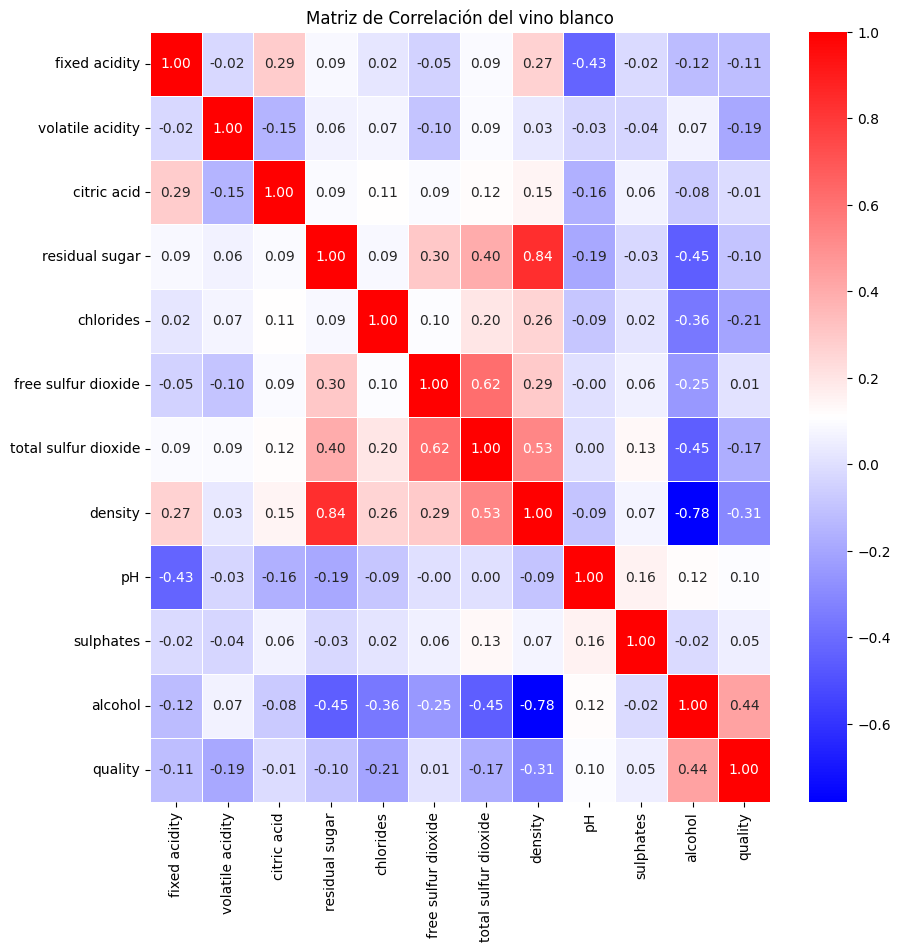

In [ ]:
cov_matrix = white_wine.corr()

# Mostraremos la matriz de correlación en una gráfica para analizarla de manera más sencilla
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='bwr', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación del vino blanco')
plt.show()

**Explicación y Análisis Matriz de Correlación:**



 Con los mapas de calor ya presentados, tanto para el Vino Tinto como el Vino Blanco podemos ver que ambos poseen correlaciones negativas y positivas, y comparandolos en conjunto podemos notar que donde presentan una correlación negativa notoria es en los atributos de densidad y alcohol.


En el mapa de Vino tinto tenemos un **-0.50**.

En el mapa de Vino blanco tenemos un **-0.78**.

**(Siendo este el con mayor correlación negativa que nos presenta el mapa de vino blanco).**


Con esto queremos decir que si aumenta el porcentaje de alcohol, la densidad tiende a bajar, pero esto no significa que gracias al alcohol sea el cambio que ocurre en la densidad, ni viceversa. Solo que estos suelen ir a la inversa.

Analizando un poco más a detalle en el mapa de vino tinto, podemos notar que la mayor correlación negativa que nos presenta este, es entre el pH y fixed acidity, con un **-0.68**.

En esta correlación si se puede presenciar que uno depende del otro, basicamente lo que queremos decir es que cuando tenemos un pH bajo, su acidez fija es más alta, dando como significado que el vino es más ácido. A su vez, si tenemos un pH alto, indica menos acidez fija lo cual nos lleva a que el vino es menos ácido.






## Parte 2: Gráficos y visualización de Datos

### Parte 2.1: Histogramas
- Para cada set de datos, grafique un histograma con 20 bins para cada uno de los atributos medidos (sin considerar la calidad de vino).
- Describa que tipo de distribución sigue cada uno de lo atributos (si es que sigue alguna).
- Describa con sus propias palabras al menos 5 diferencias notables entre vinos blancos y vinos tintos, que puede observar en los distintos histogramas graficados de cada atributo.

**Histogramas atributos del Vino Tinto**

---






In [ ]:
#Para volver a utilizar el dataset
backup = red_wine.copy()

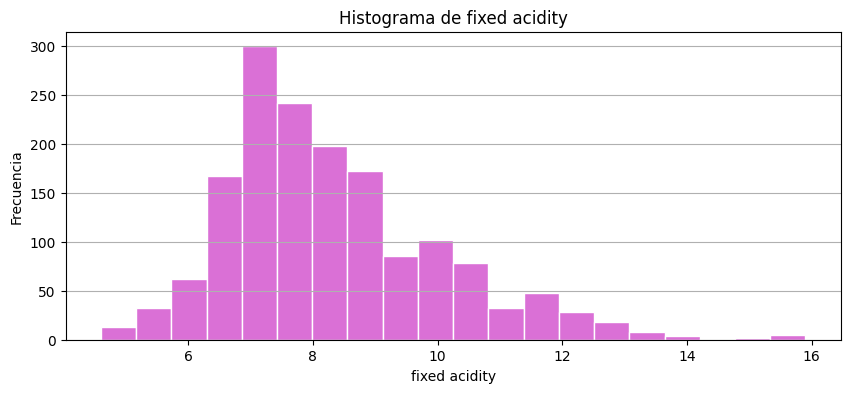

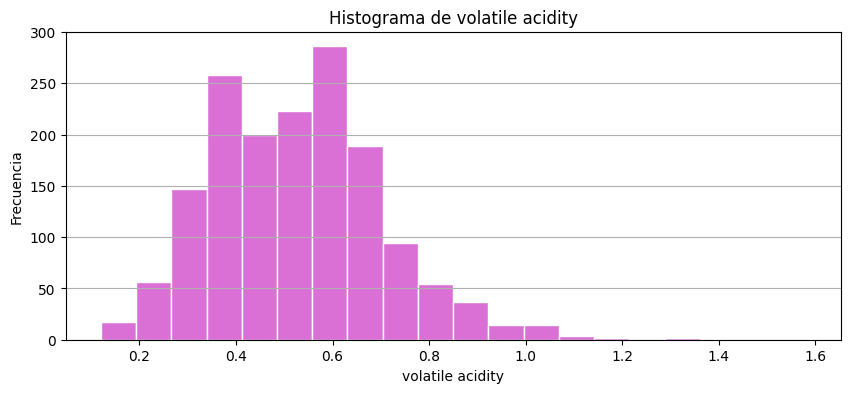

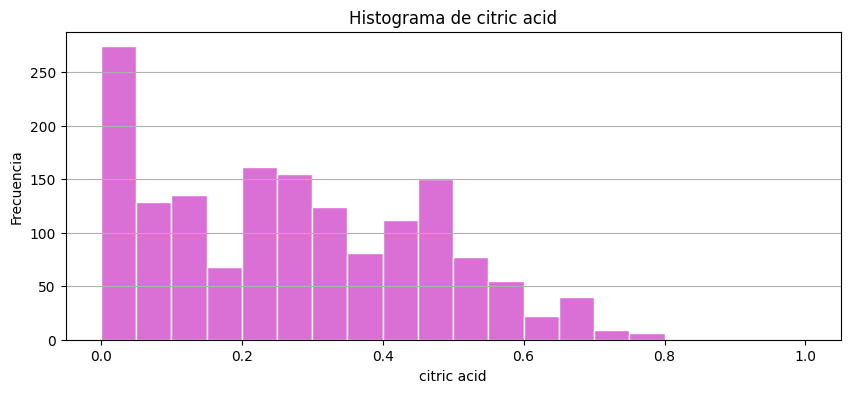

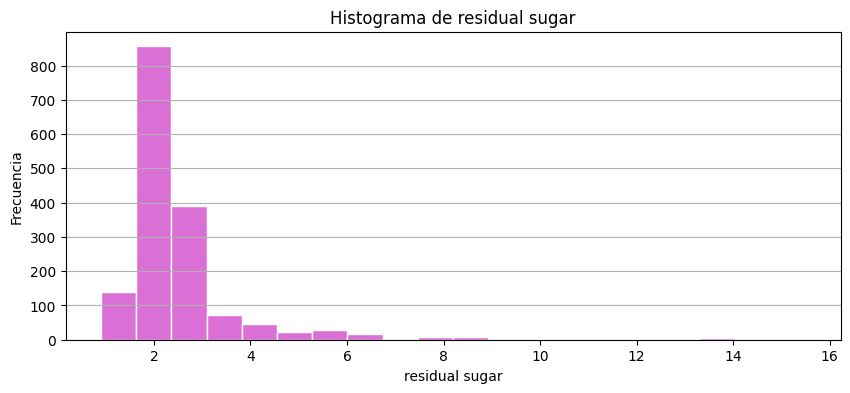

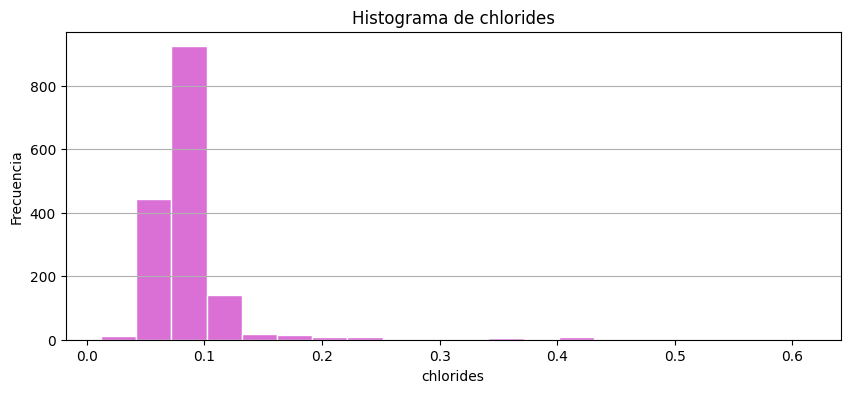

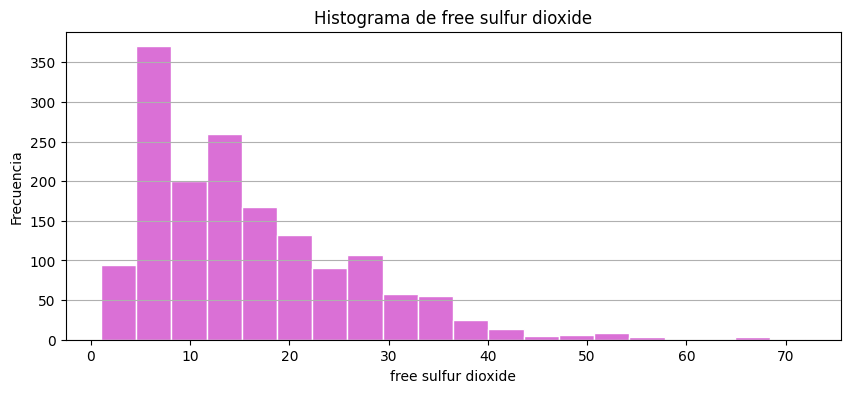

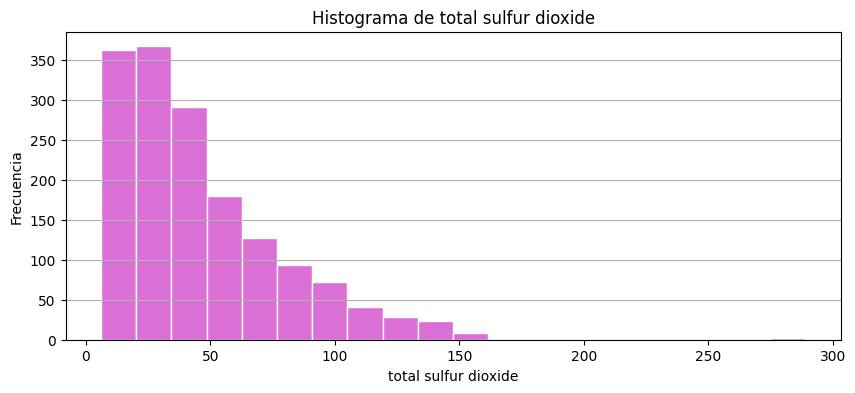

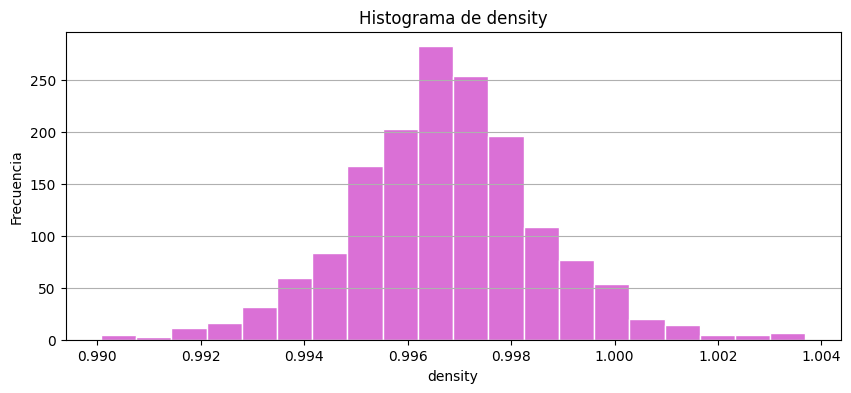

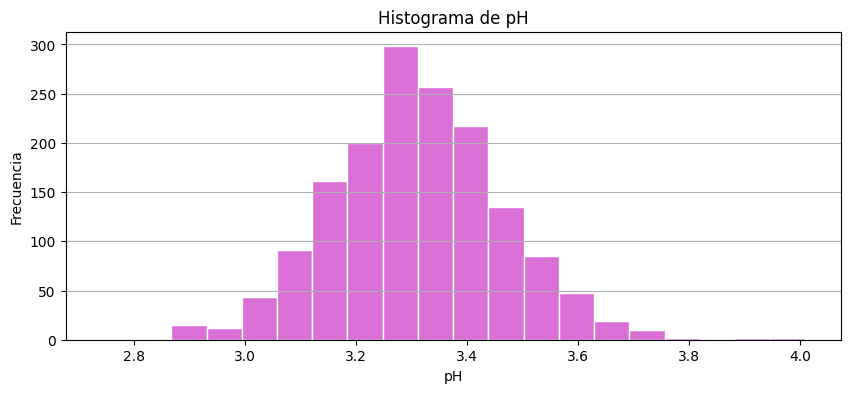

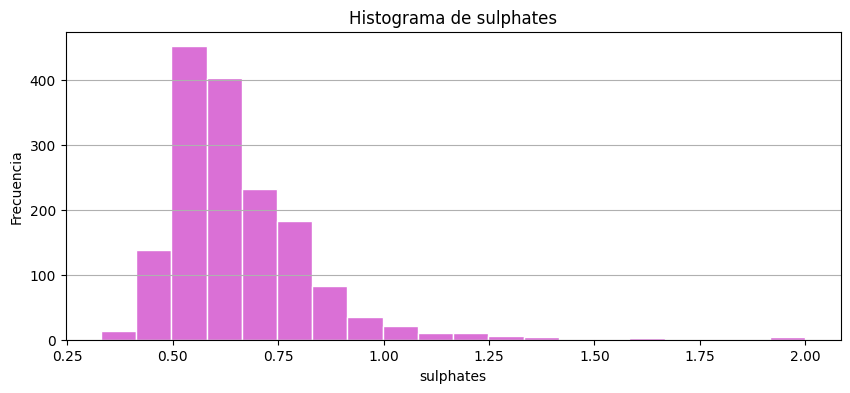

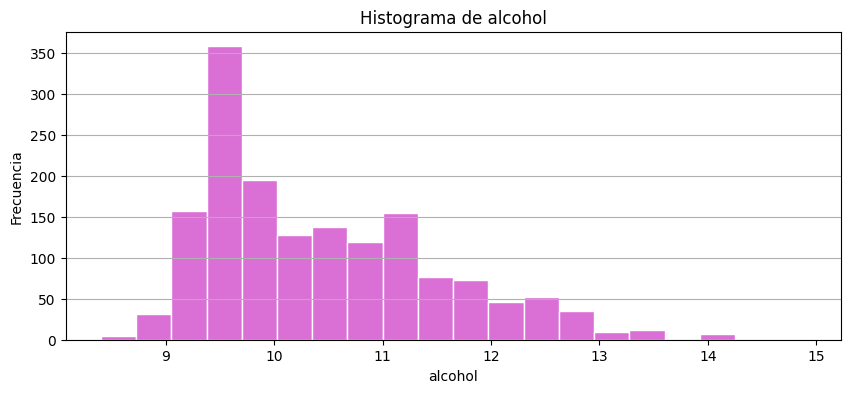

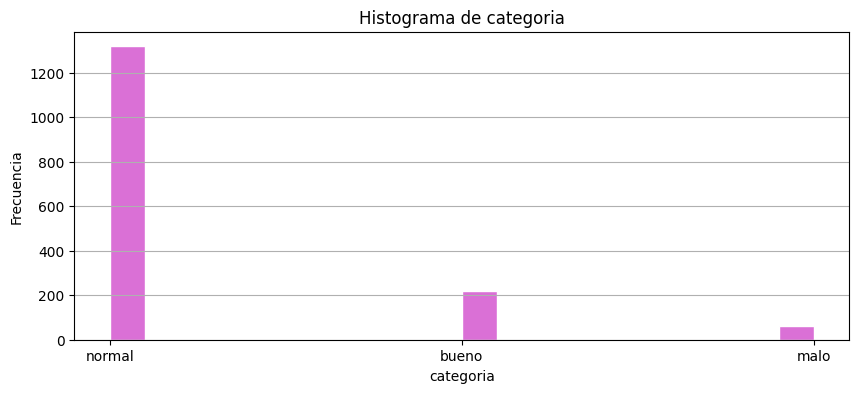

In [ ]:
# Eliminaremos la calidad del vino para que no la considere en el histograma
if 'quality' in red_wine.columns:
  red_wine = red_wine.drop('quality', axis=1)
else:
# Crearemos un histograma con 20 bins para cada uno de los atributos del vino tinto
  for columna in red_wine.columns:
    plt.figure(figsize=(10,4))
    plt.hist(red_wine[columna], bins=20, color='orchid', edgecolor='w')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

**Histogramas atributos del Vino Blanco**

---


In [ ]:
#Para volver a utilizar el dataset
backup2 = white_wine.copy()

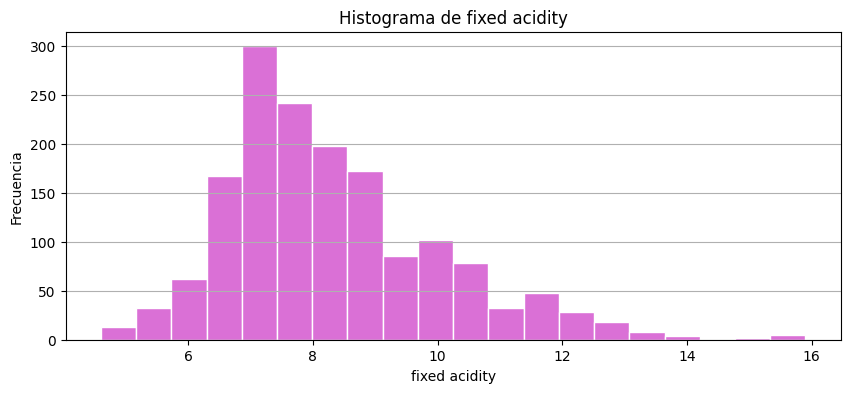

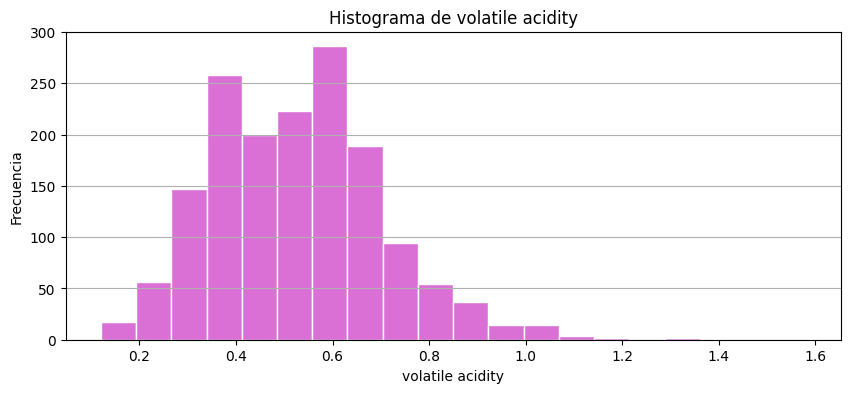

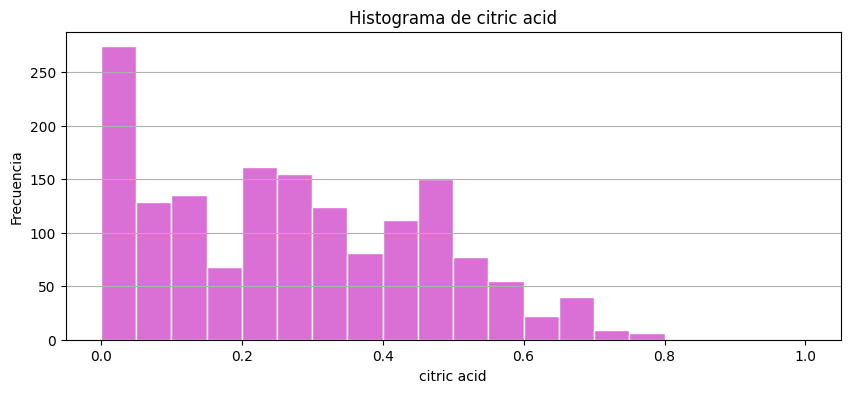

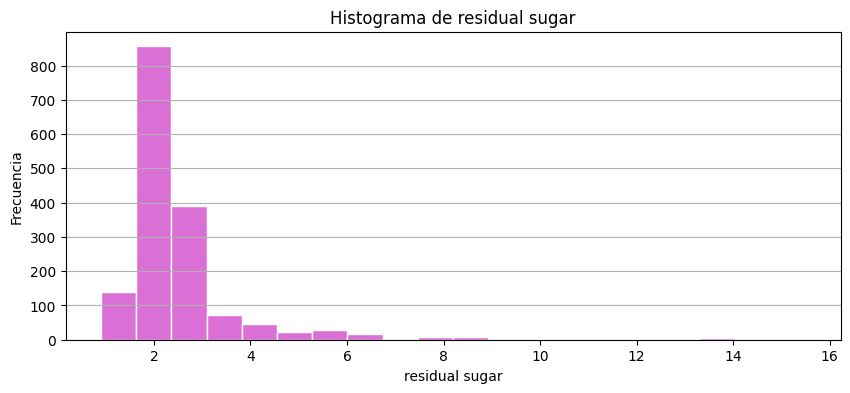

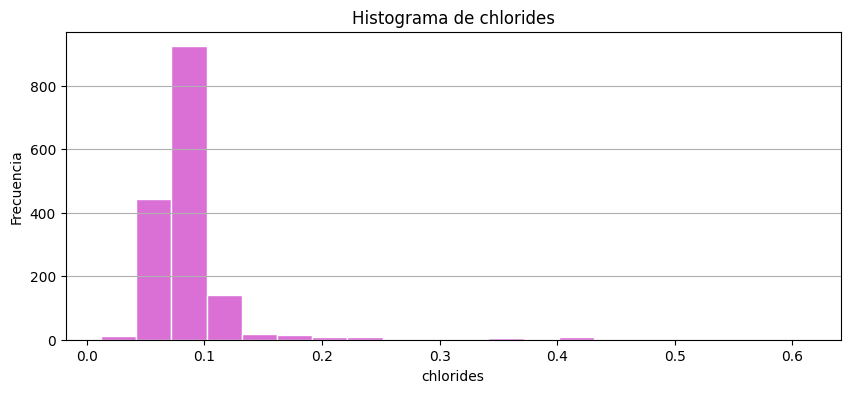

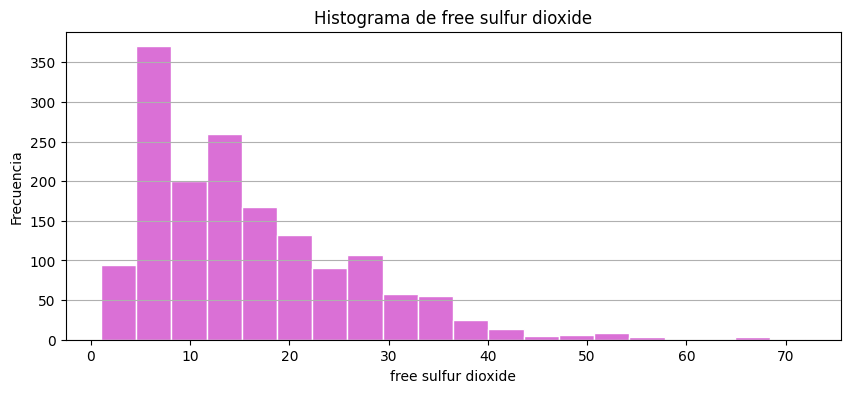

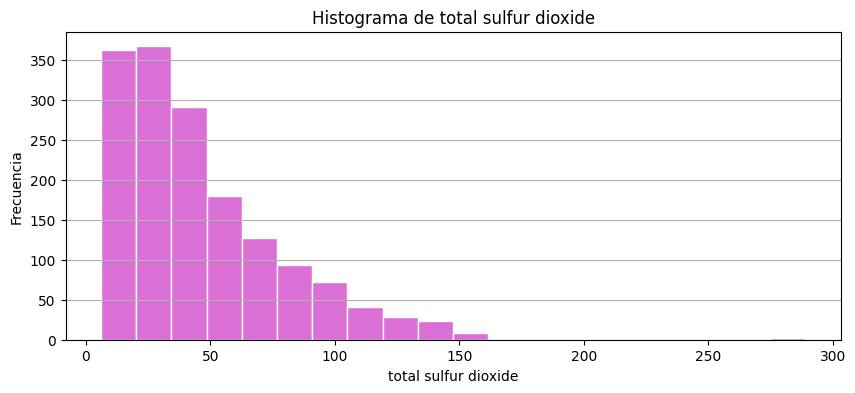

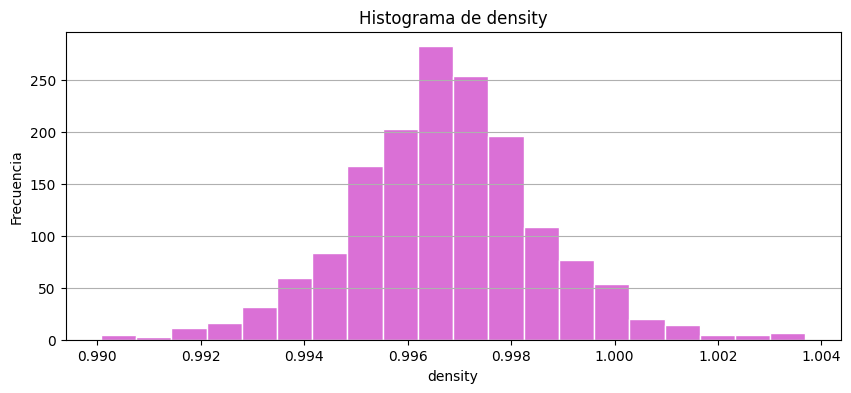

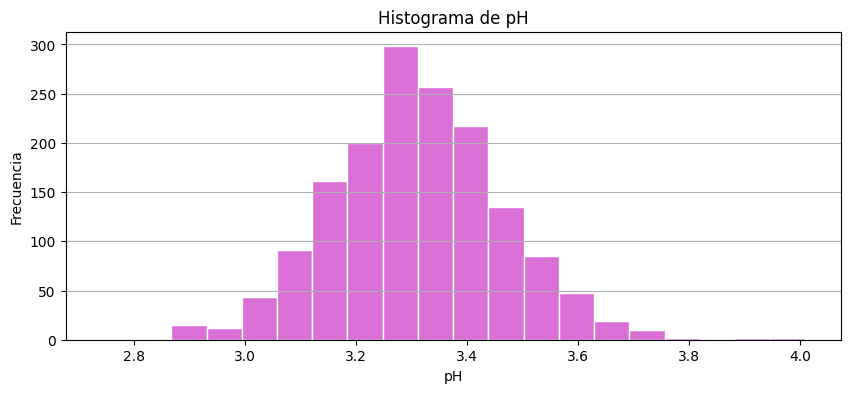

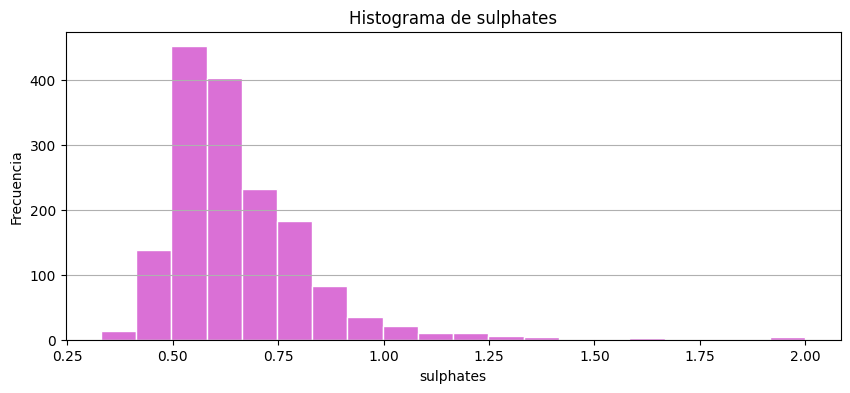

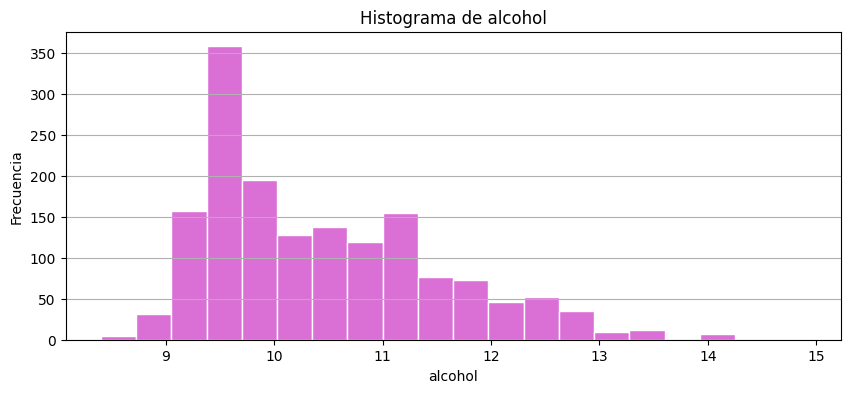

In [ ]:
#Eliminaremos la calidad del vino para que no la considere en el histograma

if 'quality' in white_wine.columns:
  white_wine = white_wine.drop('quality', axis=1)
else:
# Crearemos un histograma con 20 bins para cada uno de los atributos del vino blanco
  for columna in white_wine.columns:
    plt.figure(figsize=(10,4))
    plt.hist(white_wine[columna], bins=20, color='orchid', edgecolor='w')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

Al momento de realizar los histogramas y luego analizar estos, lo primero que debemos  tomar en cuenta al comparar ambos vinos es la frecuencia que presentan. **Esto es debido a que el número de muestras del vino blanco es mucho más elevada al del vino tinto.**

Pero a pesar de esto, sí se puede identificar que siguen ciertas distribuciones que mencionaré a continuación;

El atributo de 'fixed acidity' en el histograma de **vino blanco**, podemos notar que presenta una distribución normal. Esto también pasa en el histograma de **vino tinto**, pero no es tan notorio.

El atributo de 'pH' tanto en el histograma de **vino tinto** como **vino blanco**, estos ambos siguen una distribución normal.

El atributo de 'alcohol' en el histograma de **vino blanco**, podemos notar que presenta una distribución uniforme, y en el del **vino tinto** no es lo suficientemente notorio pues se podría definir como que está sesgado a la derecha o como también una distribución uniforme.

El atributo de 'residual sugar' en el histograma de **vino blanco**, existe una notoría distribución sesgada a la derecha.

El atributo de 'total sulfur dioxide' en el histograma de **vino tinto**, presenta una distribución sesgada a la derecha.

Cabe destacar que la representación de las distribuciones realizadas anteriormente, hay que tener muy en cuenta la frecuencia que se presenta en cada vino, solo por este cambio se puede interpretar distribuciones de una forma u otra.




---



### Parte 2.2: Agrupación simple de datos

Crear tres categorías de vino basados en el atributo de calidad de vino. Estas categorías serán definidas como : vinos malos, normales y buenos.

La categoria de vino malo tiene una calidad inferior o igual a 4, lo vinos normales tienen calidad de 5 a 6, y los vinos buenos su calidad es igual o superior a 7.

Debe agregar una columna extra definida como "categoría" y luego a cada vino asignarle una categoría adecuada.

Luego determine para cada set de Datos:

- Cantidad de vinos en cada categoría.
- Porcentaje total de vinos normales, buenos y malos.
- ¿Cual conjunto de vinos tiene mayor porcentaje de vinos buenos?
- ¿Cual conjunto de vinos tiene mayor porcentaje de vinos malos?


In [ ]:
#Llamaremos la clase copia sin el atributo quality borrado
red_wine = backup.copy()
white_wine = backup2.copy()

In [ ]:
# Primero vamos a definir la categoria nueva que nos va a evaluar los vinos en base a su calidad
def categoria_vino(quality):
  if quality <= 4:
    return 'malo'
  elif 5 <= quality <= 6:
    return 'normal'
  else:
    return 'bueno'

#Ahora aplicamos la función para poder crear una nueva columna con el nombre de categoria
red_wine['categoria'] = red_wine['quality'].apply(categoria_vino)
white_wine['categoria'] = white_wine['quality'].apply(categoria_vino)

#Con ya creada la columna nueva, vamos a buscar la cantidad de vinos que posee cada categoria
conteo_red = red_wine['categoria'].value_counts()
conteo_white = white_wine['categoria'].value_counts()

print('VINO TINTO',conteo_red)
print('VINO BLANCO',conteo_white)
#Ahora lo mismo pero calculamos el porcentaje de vinos malos, normales y buenos
conteo_red_p = red_wine['categoria'].value_counts(normalize=True) * 100
conteo_white_p = white_wine['categoria'].value_counts(normalize=True) * 100

print('PORCENTAJE VINO TINTO', conteo_red_p)
print('PORCENTAJE VINO BLANCO', conteo_white_p)

VINO TINTO categoria
normal    1319
bueno      217
malo        63
Name: count, dtype: int64
VINO BLANCO categoria
normal    3655
bueno     1060
malo       183
Name: count, dtype: int64
PORCENTAJE VINO TINTO categoria
normal    82.489056
bueno     13.570982
malo       3.939962
Name: proportion, dtype: float64
PORCENTAJE VINO BLANCO categoria
normal    74.622295
bueno     21.641486
malo       3.736219
Name: proportion, dtype: float64


**¿Cual conjunto de vinos tiene mayor porcentaje de vinos buenos?**

Podemos ver que el conjunto de vino blanco tiene mayor porcentaje de vinos buenos, con un **21.64%**.

¿Cual conjunto de vinos tiene mayor porcentaje de vinos malos?

Podemos  ver que el conjunto de vinos tinto tiene mayor porcentaje de vinos malos, con un **3.93%**.

### Parte 2.3: Gráficos de dispersión

- Para cada tipo de vino, elija 2 atributos que cumplan con una distribución normal. Grafique ambos atributos en un gráfico de dispersión pero separando en diferentes colores los grupos de vinos buenos, malos y normales. No olvide incluir título, leyenda y etiqueta de los ejes en sus gráficos.

- Para cada tipo de vino, busque los dos atributos que tengan mayor correlacion entre si (Ignore los atributos de Calidad de Vino y Categoria). Haga un gráfico de dispersión de ambas columnas.

- Para cada tipo de vino, busque los dos atributos que tengan menor correlacion entre si (Ignore los atributos de Calidad de Vino y Categoria). Haga un gráfico de dispersión de ambas columnas.

- Comente que diferencias se pueden observar entre los gráficos de correlacion y por que sucede esto para cada tipo de vino.

In [ ]:
#Agrupamos los vinos malos,normales y buenos en un distintos colores
colors = {'malo': 'red', 'normal': 'blue', 'bueno': 'green'}

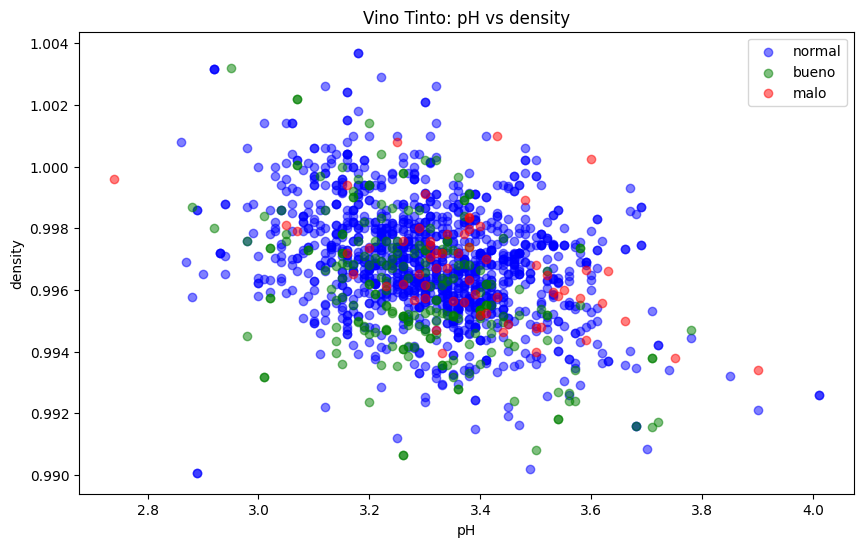

In [ ]:
#Generamos el gráfico de Dispersión
plt.figure(figsize=(10, 6))
for category in red_wine['categoria'].unique():
    subset = red_wine[red_wine['categoria'] == category]
    plt.scatter(subset['pH'], subset['density'], c=colors[category], label=category, alpha=0.5)

#Elegí estos dos atributos ya que en los histogramas se podia presenciar una distribución normal
plt.title('Vino Tinto: pH vs density')
plt.xlabel('pH')
plt.ylabel('density')
plt.legend()
plt.show()

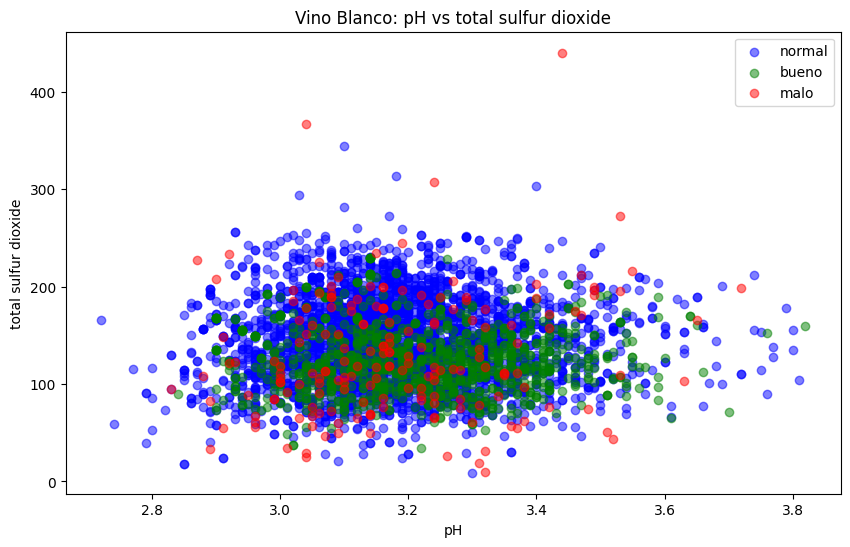

In [ ]:
plt.figure(figsize=(10, 6))

#Generamos el gráfico de Dispersión
for category in white_wine['categoria'].unique():
    subset = white_wine[white_wine['categoria'] == category]
    plt.scatter(subset['pH'], subset['total sulfur dioxide'], c=colors[category], label=category, alpha=0.5)

#Elegí estos dos atributos ya que en los histogramas se podia presenciar una distribución normal
plt.title('Vino Blanco: pH vs total sulfur dioxide')
plt.xlabel('pH')
plt.ylabel('total sulfur dioxide')
plt.legend()
plt.show()

Para cada tipo de vino, busque los dos atributos que tengan mayor correlacion entre si (Ignore los atributos de Calidad de Vino y Categoria). Haga un gráfico de dispersión de ambas columnas.

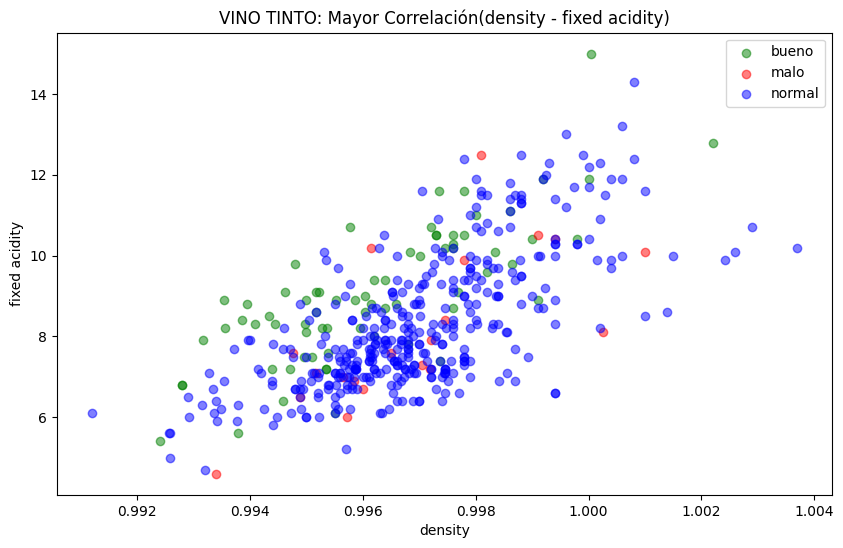

In [ ]:
plt.figure(figsize=(10, 6))

red_wine_m = red_wine.sample(frac=0.3) #Sacamos la cantidad de datos graficados para hacer mas notoria la diagonal de correlación positiva

for category in red_wine_m['categoria'].unique():
    subset = red_wine_m[red_wine_m['categoria'] == category]
    plt.scatter(subset['density'], subset['fixed acidity'], c=colors[category], label=category, alpha=0.5)

plt.title('VINO TINTO: Mayor Correlación(density - fixed acidity)')
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

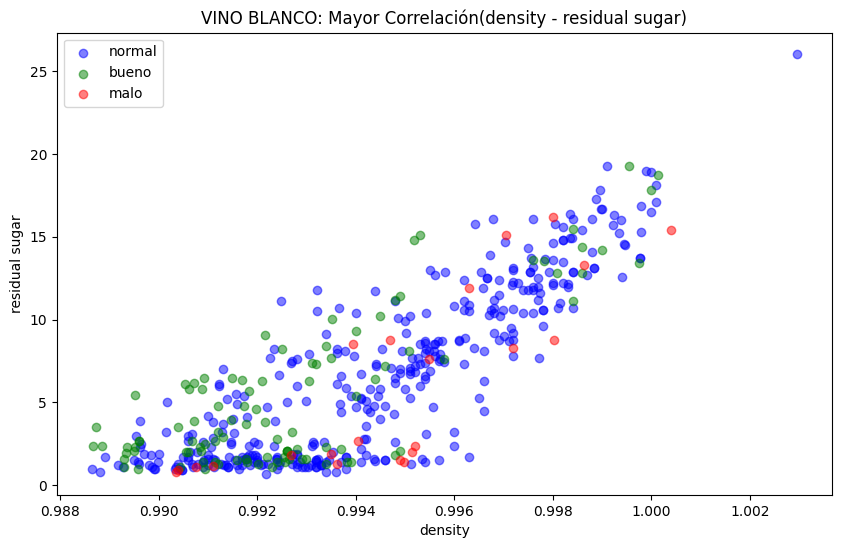

In [ ]:
plt.figure(figsize=(10, 6))

white_wine_m = white_wine.sample(frac=0.1) #Sacamos la cantidad de datos graficados para hacer mas notoria la diagonal de correlación positiva

for category in white_wine_m['categoria'].unique():
    subset = white_wine_m[white_wine_m['categoria'] == category]
    plt.scatter(subset['density'], subset['residual sugar'], c=colors[category], label=category, alpha=0.5)

plt.title('VINO BLANCO: Mayor Correlación(density - residual sugar)')
plt.xlabel('density')
plt.ylabel('residual sugar')
plt.legend()
plt.show()

Para cada tipo de vino, busque los dos atributos que tengan menor correlacion entre si (Ignore los atributos de Calidad de Vino y Categoria). Haga un gráfico de dispersión de ambas columnas.

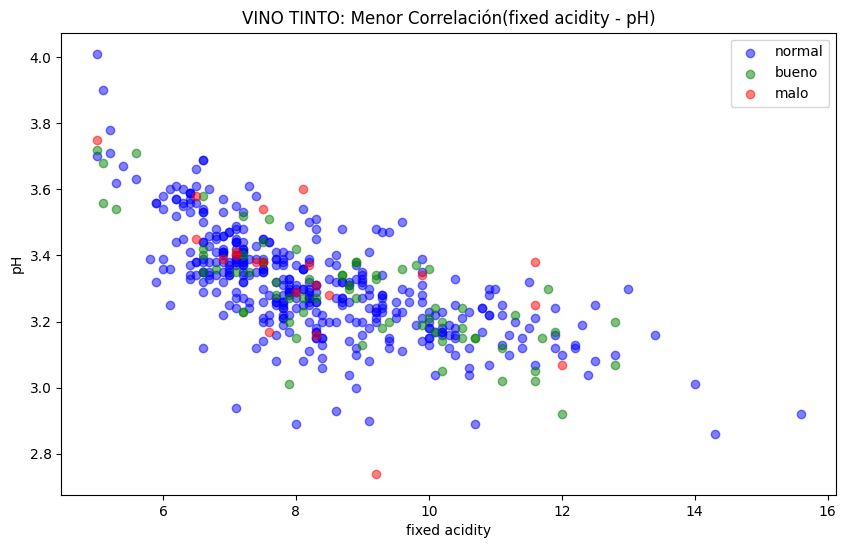

In [ ]:
plt.figure(figsize=(10, 6))

red_wine_m = red_wine.sample(frac=0.3) #Sacamos la cantidad de datos graficados para hacer mas notoria la diagonal de correlación negativa

for category in red_wine_m['categoria'].unique():
    subset = red_wine_m[red_wine_m['categoria'] == category]
    plt.scatter(subset['fixed acidity'], subset['pH'], c=colors[category], label=category, alpha=0.5)

plt.title('VINO TINTO: Menor Correlación(fixed acidity - pH)')
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.legend()
plt.show()

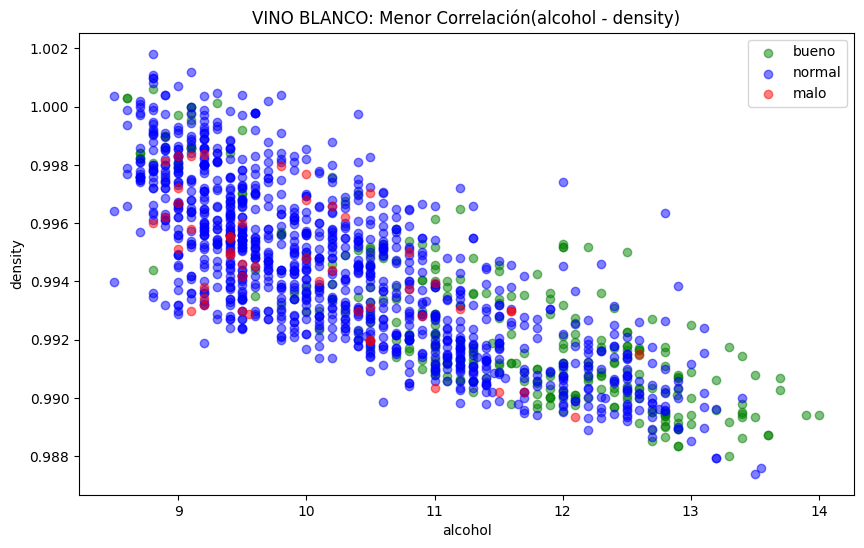

In [ ]:
plt.figure(figsize=(10, 6))

white_wine_m = white_wine.sample(frac=0.3) #Sacamos la cantidad de datos graficados para hacer mas notoria la diagonal de correlación negativa

for category in white_wine_m['categoria'].unique():
    subset = white_wine_m[white_wine_m['categoria'] == category]
    plt.scatter(subset['alcohol'], subset['density'], c=colors[category], label=category, alpha=0.5)

plt.title('VINO BLANCO: Menor Correlación(alcohol - density)')
plt.xlabel('alcohol')
plt.ylabel('density')
plt.legend()
plt.show()

**Comente que diferencias se pueden observar entre los gráficos de correlacion y por que sucede esto para cada tipo de vino**.

Podemos darnos cuenta que es nos es fácil identificar como se va a comportar los puntos teniendo una matriz de correlación hecha anteriormente. Con solo verificar si es un valor negativo nos va a  presentar una pendiente hacia abajo. Y si esta es positiva tendrá una pendiente hacia arriba.

Es notorio la frecuencia que existen en cada tipo de vino siendo uno mucho más fácil de identificar, que el otro.

## Parte 3: Métricas de distancia

La información corresponde a una base de datos de diamantes. Esta sección tiene como finalidad aplicar los conceptos de métricas de distancia explicadas en clase y visualizar la información.

Descargar la base de datos "diamond.csv" desde ucampus.

La base de datos contiene observaciones con los siguientes atributos: quilates, color, claridad, profundidad, tabla, precio, $x$ (largo en $mm$), $y$ (ancho en $mm$) y $z$ (profundidad en $mm$). Cabe recalcar que es un cojunto de datos limpio sin valores perdidos ni datos desdatos_ordenados.

- Las variables se definen:

 - **carat** representa el peso del diamante
 - **cut** define la calidad del corte (Fair, Good, Very Good, Premium, Ideal)
 - **color** representa el color del diamante desde J (peor) a D (mejor)
 - **clarity** es la medida que tan claro es el diamante ($I_{1}$ (peor), $SI_{2}$, $SI_{1}$, $VS_{2}$, $VS_{1}$, $VVS_{2}$, $VVS_{1}$, $IF$ (mejor) )  
 - **depth** representa el porcentanje total de profundidad depth = $ \frac{2z}{x+y}$
 - **table** ancho de la parte superior del diamante en relación con el punto más ancho
 - **price** precio en dolares
 - **$x$** longitud en $mm$
 - **$y$** ancho en $mm$
 - **$z$** profundidad en $mm$


- En base al material visto en clase explique la formula de distancia Euclidiana, Minkowski y Mahalanobis.  
- Investigue y liste las diferencia existentes entre las distancias mencionadas previamente.
- ¿Cual es la importancia de utilizar métricas de distancia en ciencia de datos?
- Defina cuales son las propiedades comunes de distancia.

![image.link](https://i.stack.imgur.com/YRbXc.png)
- Considere que las clases de corte (Fair, Good, Very Good, Premium, Ideal) son grupos distintos. Genere una matriz donde se compare el centro (promedio de un grupo) con respecto al todas las muestras de otro grupo. Para ello considere solo los atributos (x,y,z) como caracteristicas de distancia:
    1. Definir una funcion de distancia (ya sea euclidiana o Minkowsky) entre vectores.
    
    ```python
    def distance(vector1, vector2):
        ...
    
    ```
    2. Calcule el centro de cada conjunto de datos:
    
    3. Calcule la distancia promedio entre un grupo con respecto al centro de otro grupo:
    
    4. Disponga los valores en una matriz numpy de $5 \times 5$

|           | Fair | Good | Very Good | Premium | Ideal |
|-----------|------|------|-----------|---------|-------|
| Fair      | 0.01 | 0.97 | 0.59      | 0.15    | 0.25  |
| Good      | 0.90 | 0.88 | 0.58      | 0.19    | 0.5   |
| Very Good | 0.01 | 0.97 | 0.15      | 0.38    | 0.35  |
| Premium   | 0.42 | 0.65 | 0.38      | 0.53    | 0.71  |
| Ideal     | 0.48 | 0.15 | 0.27      | 0.24    | 0.11  |

Referencia a la estructura  de la matriz (valores aleatorios).

- Repita el proceso anterior pero considerando los atributos (x,y,z, price) ¿Cuales fue la diferencia? ¿A que se debe?  

**En base al material visto en clase explique la formula de distancia Euclidiana, Minkowski y Mahalanobis.**

Distancia Euclidiana: Esta distancia es básicamente una linea recta entre dos puntos, sin tomar en cuenta nada más que se interponga en el resultado, simplemente la distancia entre dos puntos.

Disnancia Minkowski: Esta distancia es muy parecida a la Euclidiana pero te permite darle importancia a la dimensionalidad de un punto en comparación a otro punto.

Distancia Mahalanobis: Esta distancia toma en cuenta la dispersión de los datos, con esto me refiero a que considera como se distribuyen un montón de datos, para asi realizar comparaciones mas significativas en el resultado.

**Investigue y liste las diferencia existentes entre las distancias mencionadas previamente.**

La distancia euclidiana y Minkowski tienen un cierto parecido en como funcionan, solo que la Minkowski es como una expansión de la Euclidiana, ya que en esta puedes tomar en cuenta ciertas complicaciones que se presenten al calcular la distancia entre dos puntos y no la ignora simplemente como lo hace la Euclidiana.

La distancia de Mahalanobis en este caso funciona considerando la correlación entre los puntos para así calcular la distancia.


**¿Cual es la importancia de utilizar métricas de distancia en ciencia de datos?**

Se utilizan estas métricas porque son una muy buena forma para definir que tan cerca o lejos estan los datos entre sí.



**Defina cuales son las propiedades comunes de distancia.**

Tenemos la **definidad positiva**, que nos habla que la distancia entre dos puntos es siempre mayor o igual a cero. La **simetria**, nos dice que la distancia(x,y) es la misma a la distancia(y,x). Y la **desigualdad triangular**, nos menciona que la distancia entre dos puntos es siempre menor o igual que la suma de las distancias entre uno de los puntos y un punto extra añadido.


0.5) Cargamos la base de datos de Diamonds

In [ ]:
diamonds_ruta = 'diamonds.csv'

# Cargamos la base
diamonds = pd.read_csv(diamonds_ruta, sep=',')

1) Definir una funcion de distancia (ya sea euclidiana o Minkowsky) entre vectores.

In [ ]:
# Definimos nuestra función Euclidiana
def distancia_euclidiana(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

2) Calcule el centro de cada conjunto de datos:

In [ ]:
#Agrupamos el centro de cada conjunto de datos: Fair, Good, Very Good, Premium, Ideal
centro = diamonds.groupby('cut')[['x', 'y', 'z']].mean()

3) Calcule la distancia promedio entre un grupo con respecto al centro de otro grupo

In [ ]:
distancia = np.zeros((5, 5))

for i, cut1 in enumerate(centro.index):
  for j, cut2 in enumerate(centro.index):
    centro1 = centro.loc[cut1]
    centro2 = centro.loc[cut2]
    distancia[i,j] = distancia_euclidiana(centro1, centro2)

    distancia_matriz = np.round(distancia, 2)

grupos = centro.index

#Creamos un dataFrame con los datos de la matriz, y ponemos el nombre de los indices y columnas
valores = pd.DataFrame(distancia_matriz, index=grupos, columns=grupos)

# Imprimimos los valores en una matriz Numpy
print(valores)

cut        Fair  Good  Ideal  Premium  Very Good
cut                                             
Fair       0.00  0.31   0.68     0.29       0.49
Good       0.31  0.00   0.38     0.09       0.18
Ideal      0.68  0.38   0.00     0.43       0.20
Premium    0.29  0.09   0.43     0.00       0.24
Very Good  0.49  0.18   0.20     0.24       0.00


Repita el proceso anterior pero considerando los atributos (x,y,z, price) ¿Cuales fue la diferencia? ¿A que se debe?

In [ ]:
centrop = diamonds.groupby('cut')[['x', 'y', 'z','price']].mean()

distancia = np.zeros((5, 5))

for i, cut1 in enumerate(centrop.index):
  for j, cut2 in enumerate(centrop.index):
    centro1 = centrop.loc[cut1]
    centro2 = centrop.loc[cut2]
    distancia[i,j] = distancia_euclidiana(centro1, centro2)

    distancia_matriz = np.round(distancia, 2)

grupos = centro.index

#Creamos un dataFrame con los datos de la matriz, y ponemos el nombre de los indices y columnas
valores = pd.DataFrame(distancia_matriz, index=grupos, columns=grupos)

# Imprimimos los valores en una matriz Numpy
print(valores)


cut          Fair    Good   Ideal  Premium  Very Good
cut                                                  
Fair         0.00   50.55  356.07    87.98     177.42
Good        50.55    0.00  305.52    37.43     126.87
Ideal      356.07  305.52    0.00   268.09     178.65
Premium     87.98   37.43  268.09     0.00      89.44
Very Good  177.42  126.87  178.65    89.44       0.00


## Parte 4: Discusión y Conclusiones del trabajo

1. **¿Qué pasos consideras necesarios para iniciar el análisis de una base de datos, basándote en la experiencia adquirida al trabajar con los conjuntos de datos de vinos tintos y blancos? ¿Qué aspectos son importantes tener en cuenta antes de comenzar el análisis exploratorio de datos?**

Primero que nada necesitamos el conjunto de datos, en este caso de vino tinto y blanco, y antes de empezar a trabajar en ellos básicamente aprendí a utilizar y manipular estas bases para lo que fuera necesario y requerido en la tarea. Antes de pasar al análisis exploratorio fue necesario tener las medidas de estadistica principales(mínimo, máximo, promedio, desviación estándar) para así tener un respaldo frente a lo que se nos presente cuando empecemos por los gráficos e histogramas. Es necesario tener las estadisticas principales para tener una idea de como se comportan cada uno de los atributos.


2. **Durante la tarea, se calcularon métricas de distancia entre conjuntos de datos. ¿Qué utilidad observaste al comparar estas distancias?**

Estas métricas de distancia nos sirvieron para darnos cuenta que tan similares o distintos son los conjunto de datos. Identificando anomalías u grupos de datos que sean parecidos entre sí.




3. **En la sección de gráficos y visualización de datos, se analizaron histogramas para cada atributo. ¿Qué conclusiones puedes sacar de estas visualizaciones? ¿Cuáles son las principales diferencias entre vinos blancos y tintos que observaste en los histogramas?**

Estos histogramas fueron utilizados para saber que tan a menudo aparecían ciertos resultados en un rango de datos, podemos notar comparando ambos vinos que hay ciertos histogramas que seguían una misma distribución, como también otros que no se parecían en nada y eran completamente contradictorios en este caso.

En un caso aparte, lo que se puede concluir es que tenemos atributos que es necesario que esten dentro de un rango para que los vinos sean realmente vinos. Por ejemplo el atributo del alcohol, no existen practicamente vinos que pasen de 14°, la frecuencia de estos está entre 9°-10°. Por lo tanto, sabemos que para que este calificado como un vino, tiene que estar entre ese valor.

Algo muy notorio es la frecuencia que presentan los gráficos del vino tinto y vino blanco, esto es porque el vino blanco presenta más de 3 veces la cantidad de datos que nos presenta el vino tinto.


4. **Se realizaron gráficos de dispersión para explorar la relación entre atributos y la calidad del vino. ¿Qué patrones o tendencias observaste al separar los vinos según su calidad? ¿Cómo contribuyeron estos gráficos a tu comprensión de los factores que influyen en la calidad del vino?**

A pesar de haber mencionado lo de los grado de alcohol anteriormente, ahora al tener los gráficos de dispersión con su calidad de vino. Podemos notar una anomalía en la base de datos del vino blanco, ya que, en el gráfico de densidad y alcohol, podemos notar que mientras menos densidad y más alcohol posee, estos vinos son calificados como de mejor calidad. Esto también se puede ver en la relación de residual sugar con el alcohol, mientras menos de azucar residual tiene y más alcohol tiene, de mejor calidad son los vinos.

Una pequeña conclusión que podría llegar con esto dicho es que los vinos blancos con menor densidad y menor azucal residual, pero con un mayor contenido de alcohol, son generalmente percibidos como de una mejor calidad.

Al gráficar estos datos de dispersión junto con la calidad que tienen, la verdad que pude entender mucho mejor las correlaciones que se me presentaron en un inicio. Esto fue lo que más me aclaro, porque también me presentó confusiones, pero esto probablemente sea por la diferencia en frecuencia que presenta cada vino.

**DOCUMENTACIÓN UTILIZADA:**


*   https://datascience.eu/es/matematica-y-estadistica/que-es-una-matriz-de-correlacion/

*   https://tudashboard.com/grafica-de-dispersion/

*   https://www.probabilidadyestadistica.net/histograma/

*   https://doc.arcgis.com/es/insights/latest/create/histogram.htm

*   https://www.mathworks.com/help/matlab/ref/matlab.graphics.chart.primitive.histogram.html?s_tid=doc_ta

*   https://www.mathworks.com/help/matlab/ref/scatter.html?s_tid=doc_ta













